<h3>Aufgabe: Trainieren Sie einen Klassifikator, der optimal eine Brustgewebezelle als gutartig bzw. bösartig erkennen soll.</h3>

<p>Eingangsdaten: training_data.csv

Abzugeben sind zwei Skripte/Funktionen:
trainClassifier (Trainiert mithilfe von training_data.csv einen Klassifikator)
predictDiagnosis (Klassifiziert Eingangsdaten, die das gleiche Format wie training_data.csv besitzen)

Erforderliche Doku: Begründung der Auswahl des Klassifikators und geeignete Evaluation.

---------------------------------------------
</p>
<h3>Data Set Information:</h3>

<p>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


<h4>Attribute Information:</h4>

    1) ID number 
    2) Diagnosis (M = malignant, B = benign) 
    3-32) 

Ten real-valued features are computed for each cell nucleus: 

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)


<h3>Relevant Papers:</h3>

First Usage: 

    -W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993. 
    -O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995. 

Medical literature: 

    -W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171. 
    -W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Image analysis and machine learning applied to breast cancer diagnosis and prognosis. Analytical and Quantitative Cytology and Histology, Vol. 17 No. 2, pages 77-87, April 1995. 
    -W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computerized breast cancer diagnosis and prognosis from fine needle aspirates. Archives of Surgery 1995;130:511-516. 
    -W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computer-derived nuclear features distinguish malignant from benign breast cytology. Human Pathology, 26:792--796, 1995. </p>
        

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('training_data.csv',sep=',',index_col='id')
df.head(5)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
843786           M        12.45         15.70           82.57      477.1   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   
843786            0.12780           0.17000          0.1578   

          concavepoints_mean  symmetry_mean  ...  radius_worst  texture_worst  \
id                                           ...                                
842302               0.14710         0.2419  ...         25.38          17.33   
842517               0.07017         0.1812  ...         24.99          23.41   
84348301             0.10520         0.2597  ...         14.91          26.50   
84358402             0.10430         0.1809  ...         22.54          16.67   
843786               0.08089         0.2087  ...         15.47          23.75   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   
843786             103.40       741.6            0.1791             0.5249   

          concavity_worst  concavepoints_worst  symmetry_worst  \
id                                                               
842302             0.7119               0.2654          0.4601   
842517             0.2416               0.1860          0.2750   
84348301           0.6869               0.2575          0.6638   
84358402           0.4000               0.1625          0.2364   
843786             0.5355               0.1741          0.3985   

          fractal_dimension_worst  
id                                 
842302                    0.11890  
842517                    0.08902  
84348301                  0.17300  
84358402                  0.07678  
843786                    0.12440  

[5 rows x 31 columns]

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   427.000000    427.000000      427.000000   427.000000   
mean     14.183323     19.187166       92.365340   658.448478   
std       3.484547      4.279925       24.013201   342.466836   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.760000     16.175000       75.515000   428.400000   
50%      13.400000     18.700000       86.600000   551.700000   
75%      16.050000     21.600000      105.400000   790.850000   
max      27.220000     39.280000      182.100000  2250.000000   

       smoothness_mean  compactness_mean  concavity_mean  concavepoints_mean  \
count       427.000000        427.000000      427.000000          427.000000   
mean          0.096571          0.105873        0.089531            0.049906   
std           0.013987          0.053176        0.077264            0.038815   
min           0.052630          0.019380        0.000000            0.000000   
25%           

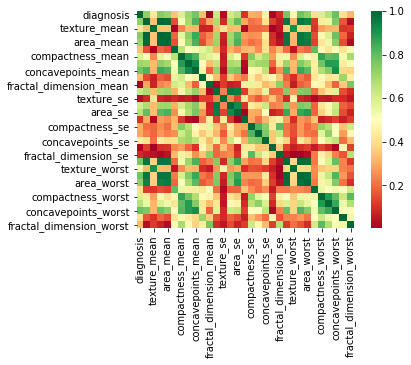

In [2]:
# Data inspection
print(df.describe())
tumor_class = {'B':0 , 'M':1}
df['diagnosis'] = df['diagnosis'].map(tumor_class)
sns.heatmap(df.corr().abs(), square=True, cmap='RdYlGn')


diagnosis              1.000000
radius_mean            0.732088
texture_mean           0.434871
perimeter_mean         0.744596
area_mean              0.716835
compactness_mean       0.590129
concavity_mean         0.710124
concavepoints_mean     0.775007
radius_se              0.629747
perimeter_se           0.616376
area_se                0.662673
concavepoints_se       0.451063
radius_worst           0.772208
texture_worst          0.474300
perimeter_worst        0.778292
area_worst             0.732549
smoothness_worst       0.409960
compactness_worst      0.593855
concavity_worst        0.661436
concavepoints_worst    0.789898
symmetry_worst         0.411490
Name: diagnosis, dtype: float64


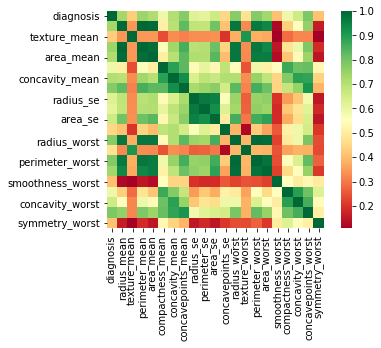

In [3]:
#Select features
data = df.loc[:,((df.corr().loc['diagnosis'].abs() >= 0.4)).values]
#col_to_drop = df.loc[:,((df.corr().loc['diagnosis'].abs() < 0.4)).values]

sns.heatmap(data.corr(), square=True, cmap='RdYlGn');
print(data.corr().loc['diagnosis'])


In [4]:
#Data split
from sklearn.model_selection import train_test_split

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12345)

In [5]:
#Standarise data
from sklearn.preprocessing import StandardScaler

# Instanziieren Sie ein Objekt StandardScaler()
stdScaler = StandardScaler()

# Berechnen Sie die Standardisierungsparameter auf dem Trainingsset (!) X_train mit Hilfe der Funktion "fit()"
stdScaler.fit(X_train)
# Wenden Sie die **selbe** Standardisierung mit Hilfe der Methode transform() auf die Trainings- und Testdaten an
X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)
X_full = np.concatenate((X_train,X_test))

In [6]:
from sklearn.model_selection import GridSearchCV

<h3>SVM</h3>

In [7]:
#1 SVM Model
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train,y_train)
train_score_svm = svm_model.score(X_train,y_train)
test_score_svm = svm_model.score(X_test,y_test)

# Ausgabe der Performance
print("Support Vector Machine - Training: {:.2f} % Test: {:.2f} %".format(train_score_svm, test_score_svm))
# Parametergitter aufstellen
param_grid_svm = [
    {'C': np.logspace(-5, 2, 8), # Die Numpy-Funktion "logspace" liefert eine logarithmische Zahlenreihe (z. B. [0.01, 0.1, 1, 10])
     'kernel': ['linear', 'rbf']}
]

# Gittersuche aufsetzen
svm_model = GridSearchCV(svm_model,param_grid_svm, 
                         cv=15,verbose=10,n_jobs=-1)
# Gittersuche durchführen
svm_model.fit(X_train,y_train)
svm_model.score(X_test,y_test)

Support Vector Machine - Training: 0.97 % Test: 0.98 %
Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1836s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0530s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0555s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed: 

0.9813084112149533

In [8]:
# Ausgabe der besten gefundenen Hyperparameter
print('get_params param')
print(svm_model.get_params)

print('best_params_ param')
print(svm_model.best_params_)
# Berechnen Sie den Trainings- und Testscore in Prozent
train_score_svm = svm_model.score(X_train,y_train)
test_score_svm = svm_model.score(X_test,y_test)

# Ausgabe der Performance
print("Tuned score_svm: Training R^2 = {:.2f} Test R^2 = {:.2f}".format(train_score_svm, test_score_svm))


get_params param
<bound method BaseEstimator.get_params of GridSearchCV(cv=15, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)>
best_params_ param
{'C': 0.1, 'kernel': 'linear'}
Tuned score_svm: Training R^2 = 0.98 Test R^2 = 0.98


<h3>MLP</h3>

In [9]:
# Import des Objekts MLPClassifier aus dem Modul neural_network im Paket sklearn
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier()
# Neuronale Netze haben immer viele Hyperparameter. Hier soll nur eine kleine Auswahl untersucht werden
param_grid_mlp = [
    {
        'hidden_layer_sizes': [(100, 50),(100, 100, 50), (100, 100, 100, 50)],
        'alpha': np.logspace(-5, 1, 7),
        'activation': ['tanh', 'relu'],
        'early_stopping': [True, False],
        'learning_rate': ['adaptive'],
    }    
]

# Gittersuche aufsetzen
mlp_model = GridSearchCV(mlp_model,param_grid_mlp,cv=15,verbose=10,n_jobs=-1)
# Gittersuche durchführen
mlp_model.fit(X_train,y_train)

Fitting 15 folds for each of 84 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0588s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0487s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   11.2s
[Parallel(n_j

GridSearchCV(cv=15, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'activation': ['tanh', 'relu'],
                          'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                          

In [10]:
# Ausgabe der besten gefundenen Hyperparameter
print(mlp_model.best_params_)

# Berechnen Sie den Trainings- und Testscore in Prozent
train_score_mlp = mlp_model.score(X_train,y_train)
test_score_mlp = mlp_model.score(X_test,y_test)

# Ausgabe der Performance
print("MLPClassifier: Training R^2 = {:.2f} Test R^2 = {:.2f}".format(train_score_mlp, test_score_mlp))


mlp_model.fit(X_test,y_test)

{'activation': 'tanh', 'alpha': 1.0, 'early_stopping': False, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'adaptive'}
MLPClassifier: Training R^2 = 0.98 Test R^2 = 0.96
Fitting 15 folds for each of 84 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0373s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1390s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    7.0s
[Parallel(n_j

GridSearchCV(cv=15, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'activation': ['tanh', 'relu'],
                          'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                          

<h3>KNN</h3>

In [24]:
# Importieren Sie das Objekt KNeighborsClassifier aus dem Modul neighbors im Paket sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instanziieren Sie ein Objekt vom Type KNeighborsClassifier mit den Standardeinstellungen für alle Parameter
knn_model = KNeighborsClassifier()
# Trainieren ("Fitten") Sie das Modell
knn_model.fit(X_train, y_train)

# Trainingsgenauigkeit (in Prozent)
train_score_knn = knn_model.score(X_train, y_train)*100
# Testgenauigkeit (in Prozent)
test_score_knn = knn_model.score(X_test, y_test)*100
# Ausgabe der Performancemaße
print("Standard KNN - Training: {:.2f} % Test: {:.2f} %".format(train_score_knn, test_score_knn))


# Importieren Sie das Objekt GridSearchCV aus dem Modul model_selection im Paket sklearn
from sklearn.model_selection import GridSearchCV

# Auswahl der zu testenden Hyperparameter (alle nicht spezifizierten bleiben auf dem Standardwert)
param_grid_knn = [
    {'n_neighbors': np.arange(1, 100, 1),  # Anzahl der Nachbarn; "arange" ist eine Numpy-Funktion zur Erzeugung einer Spanne
     'weights': ['uniform', 'distance'], # Gewichtung der Nachbarn in Entscheidungsfindung
     'p': [1, 2]},                       # Exponent der Abstandsfunktion (1: Manhattan; 2: Euklidisch)
]

# Instanziieren des Objekts "GridSearchCV"
knn_model = GridSearchCV(KNeighborsClassifier(), # Klassifikator, der benutzt werden soll
                         param_grid_knn,         # Hyperparametergitter
                         cv=20,                   # Anzahl der Folds für Kreuzvalidierung
                         verbose=10,             # Menge des Output während der Suche (größere Zahl -> mehr Info)
                         n_jobs=-1               # Anzahl der parallel genutzen CPUs; -1: alle verfügbaren CPUs nutzen
                        )

# Trainieren Sie das Modell
knn_model.fit(X_train, y_train)
# Modell trainieren

# Kreuzvalidierung zur Optimierung der Hyperparameter nicht vergessen!

# Am Ende Modell mit optimalen Hyperparametern auf allen gelabelte Daten trainieren!

Standard KNN - Training: 97.50 % Test: 96.26 %
Fitting 20 folds for each of 396 candidates, totalling 7920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0993s.) Setting batch_size=2.
exception calling callback for <Future at 0x7f99a82e8cd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/maciejwlasniak/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/maciejwlasniak/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/Users/maciejwlasniak/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/maciejwlasniak/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [16]:
print(knn_model.best_params_)
train_score_knn = knn_model.score(X_train,y_train)
test_score_knn = knn_model.score(X_test,y_test)
print("Tuned KNN - Training: {:.2f} % Test: {:.2f} %".format(train_score_knn, test_score_knn))
print("Tunned KNN parameters: {}",format(knn_model.best_params_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [17]:
# Importieren Sie das Modul pickle
import pickle

with open('tumor_predictor.pickle', 'wb') as model_file:
    # Schreiben Sie die beiden Objekte in die Datei
    pickle.dump([mlp_model, stdScaler, X.columns], model_file)